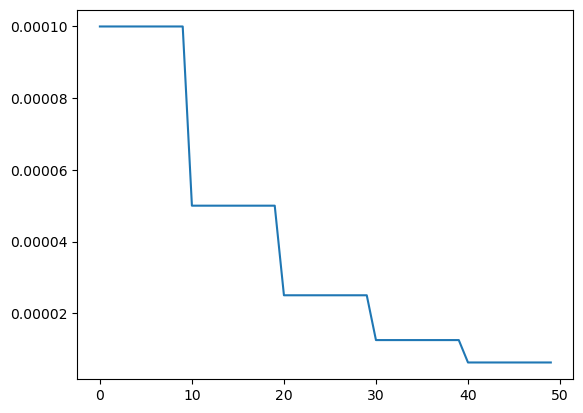

In [5]:
from matplotlib import pyplot as plt
from timm import create_model 
from timm.optim import create_optimizer
from types import SimpleNamespace
from timm.scheduler.cosine_lr import CosineLRScheduler
from timm.scheduler.step_lr import StepLRScheduler
def get_lr_per_epoch(scheduler, num_epoch):
    lr_per_epoch = []
    for epoch in range(num_epoch):
        lr_per_epoch.append(scheduler.get_epoch_values(epoch))
    return lr_per_epoch
model = create_model('resnet34')

args = SimpleNamespace()
args.weight_decay = 0
args.lr = 1e-4
args.opt = 'adam' 
args.momentum = 0.9

optimizer = create_optimizer(args, model)
num_epoch = 50
scheduler = StepLRScheduler(optimizer, decay_t = 10, decay_rate=0.5)
lr_per_epoch = get_lr_per_epoch(scheduler, num_epoch)

plt.plot([i for i in range(num_epoch)], lr_per_epoch);